<a href="https://colab.research.google.com/github/nirajpalve/Vehicle-Insurance-Prediction/blob/main/Vehicle_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color = 'darkgreen'><b> VEHICLE INSURANCE</b></font></center>

![](https://github.com/nirajpalve/Vehicle-Insurance-Prediction/raw/main/download.png)

# # <font color = ''><b> Table of Contents :-</font>-
- `Problem Statement`
- `Business Goal`
- `1 | Importing Libraries & Loading Dataset`
- `2 | Exploratory Data Analysis(EDA)`
 - `| About The Dataset`
 - `| Data Visualization`
 - `| Numerical Data`
   - `1.1| Age`
   - `1.2| Annual Premium`
   - `1.3| Policy Sales Channel`
   - `1.4| Vintage`
   - `1.5| Region_Code`
 - `| Categorical Data`
   - `2.1| Gender`
   - `2.2| Vehicle Age`
   - `2.3| Driving_License`
   - `2.4| Previously_Insured`
   - `2.4| Vehicle_Damage`
   - `2.5| Response`
 - `| Data Cleaning`
 - `| Convert Non-numerical Data into Numerical`
 - `| Splitting data into train & test set`
- `3 | Simple Model Building`
  - `3.1 | Logistic Regression`
  - `3.2 | Decision Tree`
- `4| Feature Engineering`
  - `4.1 | One Hot Encoding`
  - `4.2 | Over Sampling`
  - `4.3 | Correlation Matrix`
  - `4.4 | Splitting data into train & test set(balanced dataset)`
- `5 |Model Building(Up-dated)`
  - `5.1 | Logistic Regression`
  - `5.2 | Decision Tree`
  - `5.3 | Random Forest`
  - `5.4 | Gradient Boosting Classifier`
  - `5.5 | XGB`
- `6 | All Model wise Accuracy`

# <font color = ''><b> Problem Statement :-</font>
- `Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.`

- `An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.`

- `Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation to the customer.`


# <font color = ''><b> Business Goal </font> :-
- `Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.`

## <font color = ''><b>1 <span style='color:#0386f7de'>|</span> Importing Libraries & Loading Dataset</b></font>

In [1]:
import numpy as np      
import pandas as pd                  ## Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings 
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/nirajpalve/Vehicle-Insurance-Prediction/main/Vechicle_Insurance.csv'

In [3]:
data = pd.read_csv(url)    ## Loading Dataset
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,Female,24,1,2,0,< 1 Year,Yes,18654,152,73,0
199996,199997,Female,23,1,39,0,< 1 Year,Yes,49472,26,40,0
199997,199998,Male,52,1,29,0,1-2 Year,Yes,36164,26,233,1
199998,199999,Female,20,1,36,1,< 1 Year,No,37336,160,180,0


## <font color = ''><b>2 <span style='color:#0386f7de'>|</span> Exploratory Data Analysis(EDA) <a id="prep"></a></font>

### <font color = ''><span style='color:#0386f7de'>|</span> About The Dataset <a id="prep"></a></font>

-`Attribute Information`

- `1) Id: Unique ID for the customer.`
- `2) Gender: "Male", "Female".`
- `3) Age: Age of the customer.`
- `4) Driving_License 0 : Customer does not have DL, 1 : Customer already has DL.`
- `5) Region_Code: Unique code for the region of the customer.`
- `6) Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance.`
- `7) Vehicle_Age: Age of the Vehicle.`
- `8) Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.`
- `9) Annual_Premium: The amount customer needs to pay as premium in the year.`
- `10) PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.`
- `11) Vintage: Number of Days, Customer has been associated with the company.`
- `12) Response 1 : Customer is interested, 0 : Customer is not interested.`


In [4]:
data.info()    ## To check wheather null value exist or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    200000 non-null  int64 
 1   Gender                200000 non-null  object
 2   Age                   200000 non-null  int64 
 3   Driving_License       200000 non-null  int64 
 4   Region_Code           200000 non-null  int64 
 5   Previously_Insured    200000 non-null  int64 
 6   Vehicle_Age           200000 non-null  object
 7   Vehicle_Damage        200000 non-null  object
 8   Annual_Premium        200000 non-null  int64 
 9   Policy_Sales_Channel  200000 non-null  int64 
 10  Vintage               200000 non-null  int64 
 11  Response              200000 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 18.3+ MB


In [5]:
data.shape   ## To get the dimension of dataset (rows,columns).

(200000, 12)

In [6]:
data.drop('id', axis = 1, inplace = True)  ## Removing 'id' column from the data.

In [7]:
data.describe()   ## Describe the data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,38.795650,0.997910,26.395385,0.456605,30527.882695,112.146275,154.373845,0.122670
std,15.495972,0.045669,13.231179,0.498115,17238.332195,54.136627,83.667991,0.328059
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24394.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31619.000000,136.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39354.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


###  <font color = ''><b><span style='color:#0386f7de'>|</span> Data Visualization <a id="prep"></a></font>

### <font color = ''><b><span style='color:#0386f7de'>|</span> Numerical Data <a id="prep"></a></font>

#### <font color = ''><b>1.1<span style='color:#0386f7de'>|</span> Age <a id="prep"></a></font>

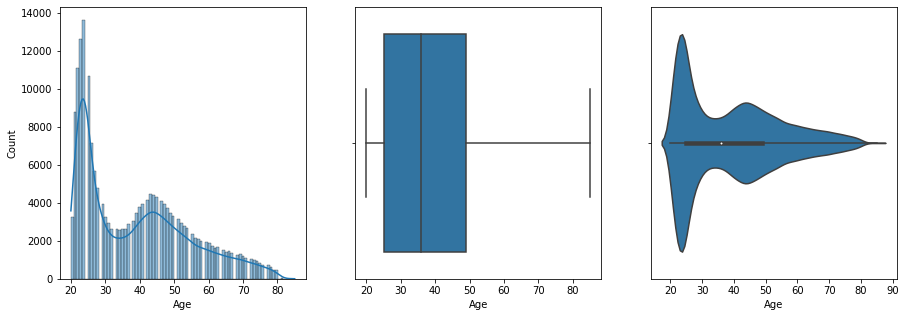

In [8]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = data, x = data['Age'], ax = ax[1])
sns.violinplot(data = data, x = data['Age'], ax = ax[2])
plt.show()

#### <font color = ''><b>1.2<span style='color:#0386f7de'>|</span> Annual Premium <a id="prep"></a></font>

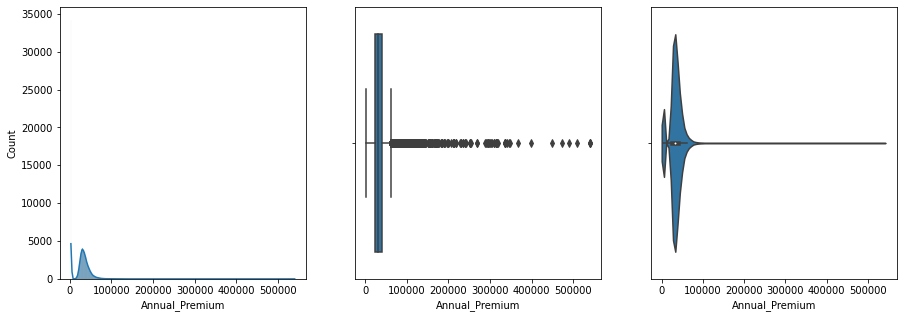

In [9]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Annual_Premium'], ax = ax[0], kde=True)     ## Annual Premium Visualization
sns.boxplot(data = data, x = data['Annual_Premium'], ax = ax[1])
sns.violinplot(data = data, x = data['Annual_Premium'], ax = ax[2])
plt.show()

#### <font color = ''><b>1.3<span style='color:#0386f7de'>|</span> Policy Sales Channel <a id="prep"></a></font>

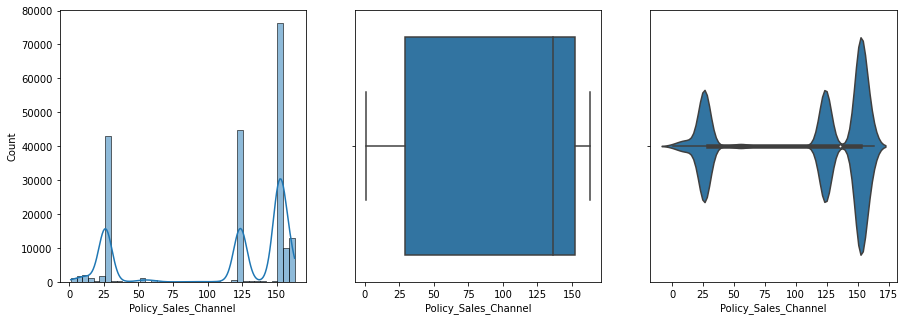

In [10]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Policy_Sales_Channel'], ax = ax[0], kde=True)     ## Policy Sales Channel Visualization
sns.boxplot(data = data, x = data['Policy_Sales_Channel'], ax = ax[1])
sns.violinplot(data = data, x = data['Policy_Sales_Channel'], ax = ax[2])
plt.show()

#### <font color = ''><b>1.4<span style='color:#0386f7de'>|</span> Vintage <a id="prep"></a></font>

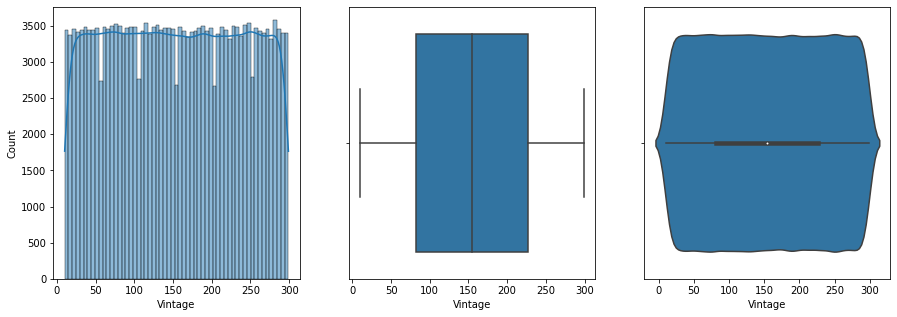

In [11]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Vintage'], ax = ax[0], kde=True)     ## Vintage Visualization
sns.boxplot(data = data, x = data['Vintage'], ax = ax[1])
sns.violinplot(data = data, x = data['Vintage'], ax = ax[2])
plt.show()

#### <font color = ''><b>1.5<span style='color:#0386f7de'>|</span> Region_Code <a id="prep"></a></font>

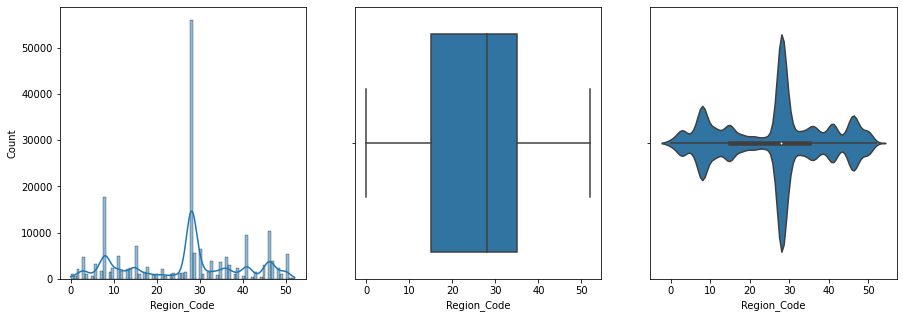

In [12]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Region_Code'], ax = ax[0], kde=True)     ## Region_Code Visualization
sns.boxplot(data = data, x = data['Region_Code'], ax = ax[1])
sns.violinplot(data = data, x = data['Region_Code'], ax = ax[2])
plt.show()

### <font color = ''><b><span style='color:#0386f7de'>|</span> Categorical Data <a id="prep"></a></font>

#### <font color = ''><b>2.1<span style='color:#0386f7de'>|</span> Gender<a id="prep"></a></font>

In [13]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',data['Gender'].unique())
print('Value Counts\n',data['Gender'].value_counts())

Unique values
 ['Male' 'Female']
Value Counts
 Male      108047
Female     91953
Name: Gender, dtype: int64


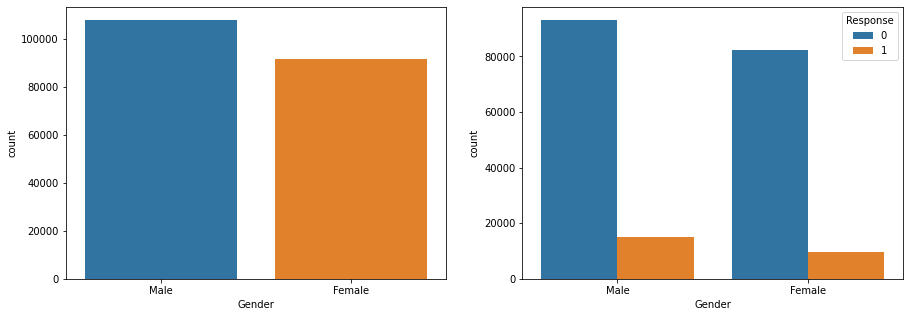

In [14]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Vehicle Age Visualization.
sns.countplot(data['Gender'], data=data, ax = axes[0])
sns.countplot(data['Gender'], hue='Response', data=data, ax = axes[1])
plt.show()

#### <font color = ''><b>2.2<span style='color:#0386f7de'>|</span> Vehicle Age<a id="prep"></a></font>

In [15]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',data['Vehicle_Age'].unique())
print('Value Counts\n',data['Vehicle_Age'].value_counts())

Unique values
 ['> 2 Years' '1-2 Year' '< 1 Year']
Value Counts
 1-2 Year     104968
< 1 Year      86590
> 2 Years      8442
Name: Vehicle_Age, dtype: int64


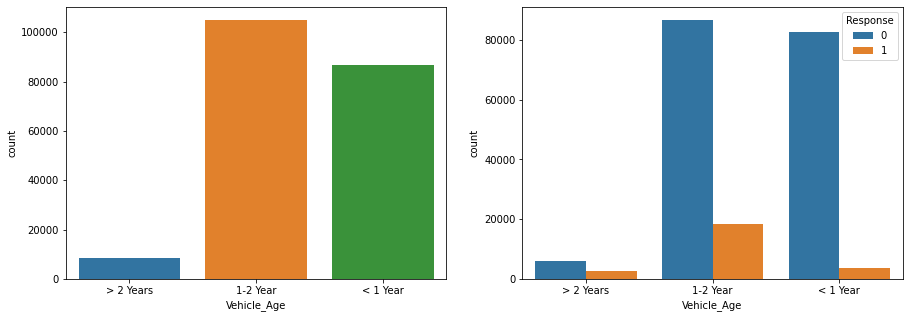

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Vehicle Age Visualization.
sns.countplot(data['Vehicle_Age'], data=data, ax = axes[0])
sns.countplot(data['Vehicle_Age'], hue='Response', data=data, ax = axes[1])
plt.show()

#### <font color = ''><b>2.3<span style='color:#0386f7de'>|</span> Driving_License <a id="prep"></a></font>

In [17]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',data['Driving_License'].unique())
print('Value Counts\n',data['Driving_License'].value_counts())

Unique values
 [1 0]
Value Counts
 1    199582
0       418
Name: Driving_License, dtype: int64


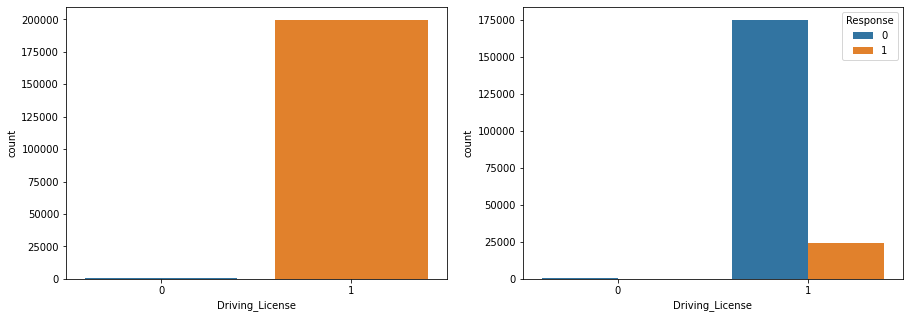

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Driving License Visualization.
sns.countplot(data['Driving_License'], data=data, ax = axes[0])
sns.countplot(data['Driving_License'], hue='Response', data=data, ax = axes[1])
plt.show()

#### <font color = ''><b>2.4<span style='color:#0386f7de'>|</span> Previously_Insured <a id="prep"></a></font>

In [19]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',data['Previously_Insured'].unique())
print('Value Counts\n',data['Previously_Insured'].value_counts())

Unique values
 [0 1]
Value Counts
 0    108679
1     91321
Name: Previously_Insured, dtype: int64


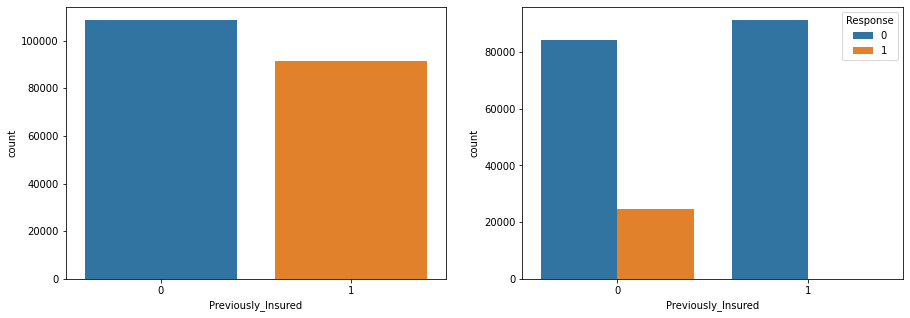

In [20]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Previously Insured Visualization.
sns.countplot(data['Previously_Insured'], data=data, ax = axes[0])
sns.countplot(data['Previously_Insured'], hue='Response', data=data, ax = axes[1])
plt.show()

#### <font color = ''><b>2.4<span style='color:#0386f7de'>|</span> Vehicle_Damage <a id="prep"></a></font>

In [21]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',data['Vehicle_Damage'].unique())
print('Value Counts\n',data['Vehicle_Damage'].value_counts())

Unique values
 ['Yes' 'No']
Value Counts
 Yes    101164
No      98836
Name: Vehicle_Damage, dtype: int64


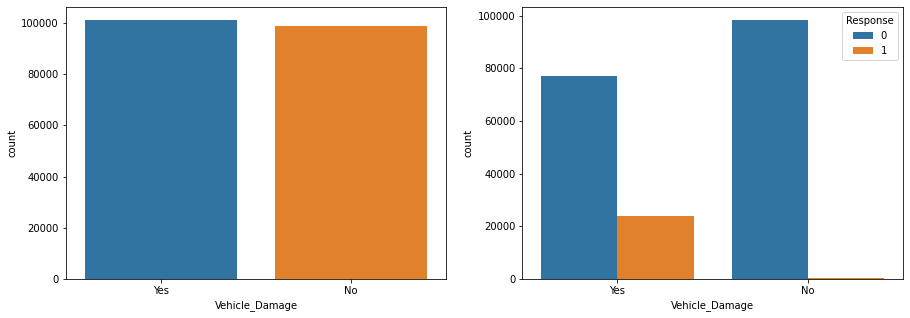

In [22]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Vehicle Damage Visualization.
sns.countplot(data['Vehicle_Damage'], data=data, ax = axes[0])
sns.countplot(data['Vehicle_Damage'], hue='Response', data=data, ax = axes[1])
plt.show()

#### <font color = ''><b>2.5<span style='color:#0386f7de'>|</span> Response <a id="prep"></a></font>

In [23]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',data['Response'].unique())
print('Value Counts\n',data['Response'].value_counts())

Unique values
 [1 0]
Value Counts
 0    175466
1     24534
Name: Response, dtype: int64


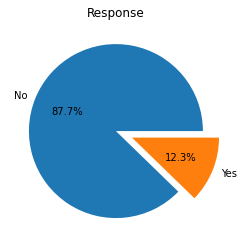

In [24]:
plt.title("Response")     ## Response Visualization
plt.pie(np.array(data['Response'].value_counts()),labels=['No','Yes'],explode=[0,0.2],autopct='%1.1f%%')
plt.show()

### <font color = ''><b><span style='color:#0386f7de'>|</span> Data Cleaning <a id="prep"></a></font>

In [25]:
annual_premium_per=data["Annual_Premium"].quantile([0.05,0.1,0.25,0.50,0.75,0.90,0.91,0.915,0.92,0.95,0.98,0.99,1])
annual_premium_per

0.050      2630.00
0.100      2630.00
0.250     24394.00
0.500     31619.00
0.750     39354.00
0.900     48419.20
0.910     49378.00
0.915     49897.00
0.920     50464.00
0.950     55180.20
0.980     65247.02
0.990     72861.10
1.000    540165.00
Name: Annual_Premium, dtype: float64

- `As per the limit set by IRDAI(Insurance Regulatory and Development Authority of India), premiums can be paid up to Rs. 50,000.`
- `So 92% of the data is cleaned and 8% of the data has issues, so we convert that 8% data to median of overall Annual Premium.`

In [26]:
data["Annual_Premium_New"]=data["Annual_Premium"]
data["Annual_Premium_New"][data["Annual_Premium"]>50000.00]=data["Annual_Premium"].median()   # Assigning the outliers as Median.

In [27]:
data.drop('Annual_Premium', axis = 1, inplace = True)  ## Removing 'Annual_Premium' column from the data.

In [28]:
data["Annual_Premium_New"].describe()  ## Description of New Annual Premium column.

count    200000.000000
mean      27978.514440
std       13152.633601
min        2630.000000
25%       24394.000000
50%       31619.000000
75%       36370.000000
max       50000.000000
Name: Annual_Premium_New, dtype: float64

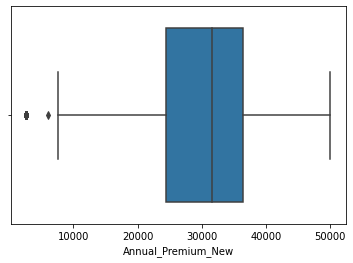

In [29]:
sns.boxplot(data = data, x = data['Annual_Premium_New'])  ## Box plot of cleaned Annual Premium.
plt.show()

###  <font color = ''><b><span style='color:#0386f7de'>|</span> Convert Non-numerical Data into Numerical <a id="prep"></a></font>

In [30]:
df = data.copy()  ## Copying the prevoius data to new flag variable so we can edit the new data and prevent the previous data.

In [31]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium_New
0,Male,44,1,28,0,> 2 Years,Yes,26,217,1,40454
1,Male,76,1,3,0,1-2 Year,No,26,183,0,33536
2,Male,47,1,28,0,> 2 Years,Yes,26,27,1,38294
3,Male,21,1,11,1,< 1 Year,No,152,203,0,28619
4,Female,29,1,41,1,< 1 Year,No,152,39,0,27496
...,...,...,...,...,...,...,...,...,...,...,...
199995,Female,24,1,2,0,< 1 Year,Yes,152,73,0,18654
199996,Female,23,1,39,0,< 1 Year,Yes,26,40,0,49472
199997,Male,52,1,29,0,1-2 Year,Yes,26,233,1,36164
199998,Female,20,1,36,1,< 1 Year,No,160,180,0,37336


In [32]:
df["Gender"][df["Gender"] == "Male"] = 1        ## Assigning Male as 1 and Female as 0
df["Gender"][df["Gender"] == "Female"] = 0

In [33]:
df["Vehicle_Age"][df["Vehicle_Age"]=="< 1 Year"] = 0     ## Assigning vehicle age less than 1 as 0, between 1-2 as 1 & greater than 2 as 2. 
df["Vehicle_Age"][df["Vehicle_Age"]=="1-2 Year"] = 1
df["Vehicle_Age"][df["Vehicle_Age"]=="> 2 Years"] = 2

In [34]:
df["Vehicle_Damage"][df["Vehicle_Damage"]=="No"] = 0    ## Assigning Vehicle damage yes as 1 & no as 0.
df["Vehicle_Damage"][df["Vehicle_Damage"]=="Yes"] = 1

### <font color = ''><b> <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [35]:
X = df.drop(columns = 'Response')    ## Separating response column from the rest features for test and train dataset.
y = df[['Response']] 

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 12, stratify = y )  ## Spliting data into train and test.

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape   ## Shape of the train and test data.

((150000, 10), (50000, 10), (150000, 1), (50000, 1))

## <font color = ''><b>3 <span style='color:#0386f7de'>|</span> Simple Model Building <a id="prep"></a></font>

###  <font color = ''><b>3.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [38]:
logistic_model = LogisticRegression()    ## Importing Logistic Model. 
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic_model.intercept_)
print("coefficients = \n " , logistic_model.coef_)

Intercept = [-0.0116899]
coefficients = 
  [[ 6.17068393e-03 -1.61956109e-04 -1.11111621e-02 -2.87791328e-02
  -1.12350062e-01  5.22688861e-02  1.06414160e-01 -8.99834853e-03
  -1.30896206e-03 -4.81133854e-06]]


In [40]:
# calculating the Accuracy, Sensitivity, Specificity  of the model on train data

predict1 = logistic_model.predict(X_train)
cm1 = confusion_matrix(y_train,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
Accuracy = (cm1[0,0] + cm1[1,1]) / total1
print("Overall accuracy on train data for all the variables = " , Accuracy)
print ('Accuracy : ', Accuracy)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

Confusion matrix = 
 [[131599      1]
 [ 18399      1]]
Overall accuracy on train data for all the variables =  0.8773333333333333
Accuracy :  0.8773333333333333
Sensitivity :  0.9999924012158055
Specificity :  5.4347826086956524e-05


In [41]:
# calculating the Accuracy, Sensitivity, Specificity  of the model on test data

predict2 = logistic_model.predict(X_test)
cm1 = confusion_matrix(y_test,predict2)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
Accuracy = (cm1[0,0] + cm1[1,1]) / total1
print("Overall accuracy on test data for all the variables = " , Accuracy)
print ('Accuracy : ', Accuracy)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

Confusion matrix = 
 [[43865     1]
 [ 6134     0]]
Overall accuracy on test data for all the variables =  0.8773
Accuracy :  0.8773
Sensitivity :  0.9999772033009621
Specificity :  0.0


###  <font color = ''><b>3.2 <span style='color:#0386f7de'>|</span> Decision Tree <a id="prep"></a></font>

In [142]:
dt_model = DecisionTreeClassifier(random_state=12,max_depth=12)   ## Importing Decision Tree Model.
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=12)

In [143]:
predict1 = dt_model.predict(X_train)
predict2 = dt_model.predict(X_test)

cm = confusion_matrix(y_train, predict1)     ## Confusion Matrix for Decision Tree Model.
print ("CM:",   cm)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1      
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

CM: [[131410    190]
 [ 17594    806]]
Train Accuracy 0.88144
Test Accuracy 0.87384
Sensitivity :  0.9985562310030395
Specificity :  0.043804347826086956


##  <font color = ''><b>4<span style='color:#0386f7de'>|</span> Feature Engineering <a id="prep"></a></font>

###  <font color = ''><b>4.1 <span style='color:#0386f7de'>|</span> One Hot Encoding  <a id="prep"></a></font>

In [44]:
df_1 = data.copy()

In [46]:
cat_col = ['Vehicle_Age']
cat_cols = ['Gender','Vehicle_Damage']

In [47]:
df_encc = pd.get_dummies(df_1[cat_cols], drop_first = True)    
df_enc = pd.get_dummies(df_1[cat_col]) 

In [48]:
df_1[df_encc.columns] = df_encc
df_1[df_enc.columns] = df_enc

In [49]:
df_1.drop(['Gender','Vehicle_Damage','Vehicle_Age'],axis =1, inplace = True)   

In [50]:
df_1

,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response,Annual_Premium_New,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,28,0,26,217,1,40454,1,1,0,0,1
1,76,1,3,0,26,183,0,33536,1,0,1,0,0
2,47,1,28,0,26,27,1,38294,1,1,0,0,1
3,21,1,11,1,152,203,0,28619,1,0,0,1,0
4,29,1,41,1,152,39,0,27496,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,24,1,2,0,152,73,0,18654,0,1,0,1,0
199996,23,1,39,0,26,40,0,49472,0,1,0,1,0
199997,52,1,29,0,26,233,1,36164,1,1,1,0,0
199998,20,1,36,1,160,180,0,37336,0,0,0,1,0


In [51]:
df_1.rename(columns = {'Vehicle_Age_1-2 Year':'Veh_age_1-2yr',
                       'Vehicle_Age_< 1 Year': 'Veh_age_lessthan_1yr',               ## Changing Column Names
                       'Vehicle_Age_> 2 Years':'Veh_age_greathan_2yr'}, inplace =True)

###  <font color = ''><b>4.2 <span style='color:#0386f7de'>|</span> Over Sampling <a id="prep"></a></font>

In [52]:
print("Actual Data :", df_1.shape)

#Frequency count on target column
freq = df_1['Response'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
Response_class0 = df_1[df_1['Response'] == 0]
Response_class1 = df_1[df_1['Response'] == 1]

print("Class0 Actual :", Response_class0.shape)
print("Class1 Actual  :", Response_class1.shape)

Actual Data : (200000, 13)
0    175466
1     24534
Name: Response, dtype: int64
0    87.733
1    12.267
Name: Response, dtype: float64
Class0 Actual : (175466, 13)
Class1 Actual  : (24534, 13)


In [111]:
##Undersampling of class-0
## Consider half of class-0
Response_class0_under = Response_class0.sample(int(0.6*len(Response_class0)))
print("Class0 Undersample :", Response_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
Response_class1_over = Response_class1.sample(4*len(Response_class1),replace=True)
print("Class1 Oversample :", Response_class1_over.shape)

#Concatenate to create the final balanced data
Response_balanced=pd.concat([Response_class0_under,Response_class1_over])
print("Final Balannced Data :", Response_balanced.shape)

#Frequency count on target column in the balanced data
freq = Response_balanced['Response'].value_counts()
print(freq)
print((freq/freq.sum())*100)

Class0 Undersample : (105279, 13)
Class1 Oversample : (98136, 13)
Final Balannced Data : (203415, 13)
0    105279
1     98136
Name: Response, dtype: int64
0    51.75577
1    48.24423
Name: Response, dtype: float64


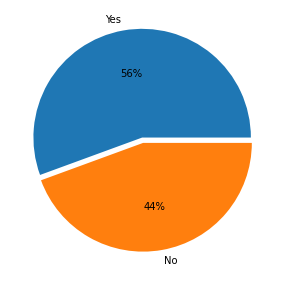

In [84]:
plt.figure(figsize=(8,5))            ## Balanced Response.
plt.pie(x=Response_balanced['Response'].value_counts() ,autopct="%1.0f%%",explode=(0.05,0),labels=["Yes","No"])
plt.show()

###  <font color = ''><b>4.3 <span style='color:#0386f7de'>|</span> Correlation Matrix  <a id="prep"></a></font>

In [112]:
df_2 = Response_balanced.copy()

In [113]:
corr_matrix = df_2.corr()   ## Corrlation Matrix.
corr_matrix

,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Response,Annual_Premium_New,Gender_Male,Vehicle_Damage_Yes,Veh_age_1-2yr,Veh_age_lessthan_1yr,Veh_age_greathan_2yr
Age,1.000000,-0.066360,0.034080,-0.261627,-0.521302,-0.002799,0.182930,0.045643,0.131428,0.273429,0.580915,-0.735845,0.243848
Driving_License,-0.066360,1.000000,0.000113,0.001314,0.029598,0.000854,0.020060,-0.007418,-0.013861,-0.002529,-0.024096,0.027425,-0.004291
Region_Code,0.034080,0.000113,1.000000,-0.025257,-0.035966,-0.001748,0.017529,0.005843,-0.006944,0.028318,0.031253,-0.040021,0.013932
Previously_Insured,-0.261627,0.001314,-0.025257,1.000000,0.234913,0.002567,-0.581972,0.013043,-0.087042,-0.853200,-0.304452,0.403503,-0.161369
Policy_Sales_Channel,-0.521302,0.029598,-0.035966,0.234913,1.000000,0.000870,-0.210057,-0.128926,-0.089674,-0.243744,-0.381701,0.498537,-0.188496
Vintage,-0.002799,0.000854,-0.001748,0.002567,0.000870,1.000000,-0.003434,-0.001686,0.000564,-0.000873,0.000011,-0.001045,0.001943
Response,0.182930,0.020060,0.017529,-0.581972,-0.210057,-0.003434,1.000000,0.017602,0.078008,0.589136,0.259603,-0.343275,0.136115
Annual_Premium_New,0.045643,-0.007418,0.005843,0.013043,-0.128926,-0.001686,0.017602,1.000000,-0.000858,0.003604,-0.030330,-0.001894,0.063070
Gender_Male,0.131428,-0.013861,-0.006944,-0.087042,-0.089674,0.000564,0.078008,-0.000858,1.000000,0.094131,0.111268,-0.141147,0.047090
Vehicle_Damage_Yes,0.273429,-0.002529,0.028318,-0.853200,-0.243744,-0.000873,0.589136,0.003604,0.094131,1.000000,0.307323,-0.413159,0.173893


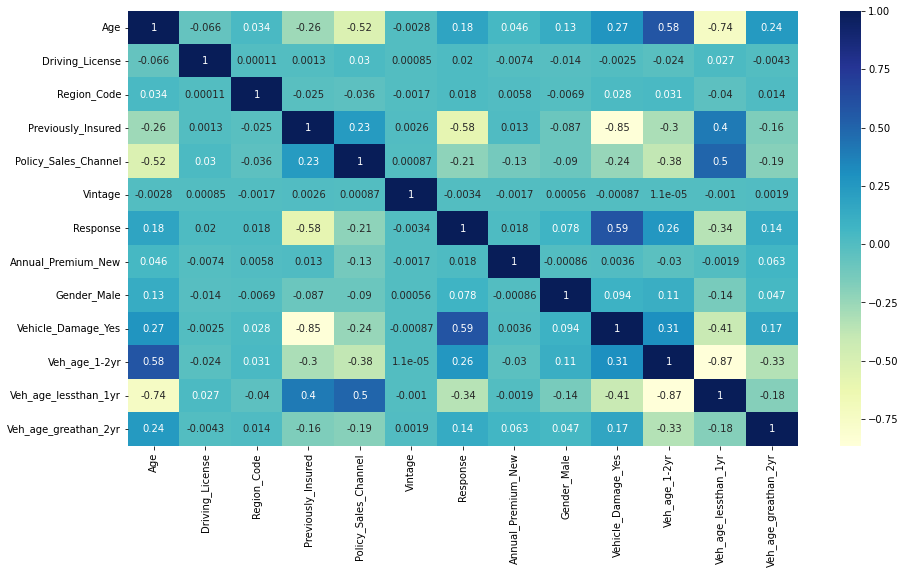

In [114]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")    ## Heat map 
plt.show()

### <font color = ''><b>4.4 <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [115]:
X_1 = df_2.drop(columns = 'Response')    
y_1 = df_2[['Response']]

In [116]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1, y_1, random_state = 12) ## Spliting data into train and test of balanced data.

In [117]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape   ## Shape of the train and test data.

((152561, 12), (50854, 12), (152561, 1), (50854, 1))

##  <font color = ''><b>5 <span style='color:#0386f7de'>|</span>Model Building(Up-dated)<a id="prep"></a></font>

###  <font color = ''><b>5.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [118]:
logistic_model = LogisticRegression()    ## Fitting Logistic Model. 
logistic_model.fit(X_train_1,y_train_1)

LogisticRegression()

In [119]:
logistic_pred_train = logistic_model.predict(X_train_1)      ## Train Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,logistic_pred_train))

Accuracy Score                 : 0.6744
Precision Score                : 0.6669
Recall Score                   : 0.6495
Confusion Matrix               :
 [[55097 23872]
 [25797 47795]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.68      0.70      0.69     78969
           1       0.67      0.65      0.66     73592

    accuracy                           0.67    152561
   macro avg       0.67      0.67      0.67    152561
weighted avg       0.67      0.67      0.67    152561



In [120]:
logistic_pred_test = logistic_model.predict(X_test_1)                   ## Test Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,logistic_pred_test))

Accuracy Score                 : 0.6771
Precision Score                : 0.6705
Recall Score                   : 0.6507
Confusion Matrix               :
 [[18461  7849]
 [ 8574 15970]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.68      0.70      0.69     26310
           1       0.67      0.65      0.66     24544

    accuracy                           0.68     50854
   macro avg       0.68      0.68      0.68     50854
weighted avg       0.68      0.68      0.68     50854



Area Under Curve     : 0.6761702778327008


Text(0, 0.5, 'True Positive Rate')

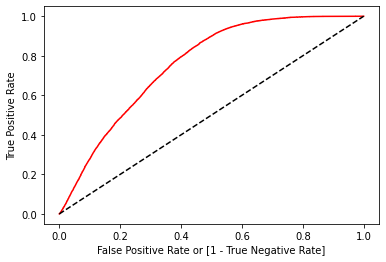

In [121]:
fpr, tpr, thresholds = roc_curve(y_test_1,logistic_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, logistic_pred_test)
print('Area Under Curve     :',auc_score)                          ## AUC-ROC Curve.
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = ''><b>5.2 <span style='color:#0386f7de'>|</span> Decision Tree <a id="prep"></a></font>

In [122]:
dt_model = DecisionTreeClassifier(random_state=15,max_depth=12)   ## Fitting Decision Tree Model.
dt_model.fit(X_train_1,y_train_1)

DecisionTreeClassifier(max_depth=12, random_state=15)

In [123]:
dt_pred_train = dt_model.predict(X_train_1)                ## Train Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,dt_pred_train))

Accuracy Score                 : 0.8108
Precision Score                : 0.7425
Recall Score                   : 0.9304
Confusion Matrix               :
 [[55222 23747]
 [ 5124 68468]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.92      0.70      0.79     78969
           1       0.74      0.93      0.83     73592

    accuracy                           0.81    152561
   macro avg       0.83      0.81      0.81    152561
weighted avg       0.83      0.81      0.81    152561



In [124]:
dt_pred_test = dt_model.predict(X_test_1)                             ## Test Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,dt_pred_test))

Accuracy Score                 : 0.8005
Precision Score                : 0.7333
Recall Score                   : 0.9219
Confusion Matrix               :
 [[18080  8230]
 [ 1916 22628]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.90      0.69      0.78     26310
           1       0.73      0.92      0.82     24544

    accuracy                           0.80     50854
   macro avg       0.82      0.80      0.80     50854
weighted avg       0.82      0.80      0.80     50854



Area Under Curve     : 0.8045636483963889


Text(0, 0.5, 'True Positive Rate')

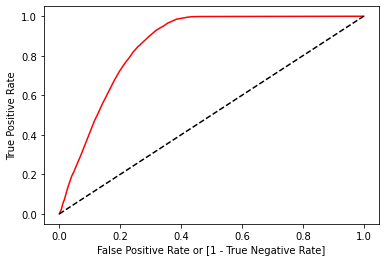

In [125]:
fpr, tpr, thresholds = roc_curve(y_test_1,dt_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, dt_pred_test)
print('Area Under Curve     :',auc_score)                          ## AUC-ROC Curve.
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = ''><b>5.3 <span style='color:#0386f7de'>|</span> Random Forest <a id="prep"></a></font>

In [126]:
rf_model = RandomForestClassifier(random_state=15, max_depth=12)   ## Fitting Random Forest Model.
rf_model.fit(X_train_1,y_train_1)

RandomForestClassifier(max_depth=12, random_state=15)

In [127]:
rf_pred_train = rf_model.predict(X_train_1)                         ## Train Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,rf_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,rf_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,rf_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,rf_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,rf_pred_train))

Accuracy Score                 : 0.8162
Precision Score                : 0.7405
Recall Score                   : 0.9528
Confusion Matrix               :
 [[54402 24567]
 [ 3476 70116]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.94      0.69      0.80     78969
           1       0.74      0.95      0.83     73592

    accuracy                           0.82    152561
   macro avg       0.84      0.82      0.81    152561
weighted avg       0.84      0.82      0.81    152561



In [128]:
rf_pred_test = rf_model.predict(X_test_1)                              ## Test Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,rf_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,rf_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,rf_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,rf_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,rf_pred_test))

Accuracy Score                 : 0.8078
Precision Score                : 0.7331
Recall Score                   : 0.9462
Confusion Matrix               :
 [[17854  8456]
 [ 1320 23224]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.93      0.68      0.79     26310
           1       0.73      0.95      0.83     24544

    accuracy                           0.81     50854
   macro avg       0.83      0.81      0.81     50854
weighted avg       0.84      0.81      0.80     50854



Area Under Curve     : 0.8124101637431943


Text(0, 0.5, 'True Positive Rate')

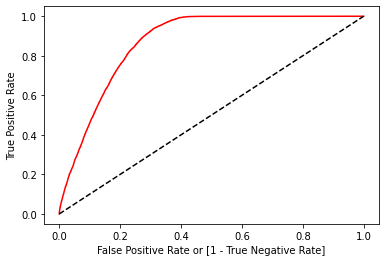

In [129]:
fpr, tpr, thresholds = roc_curve(y_test_1,rf_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, rf_pred_test)
print('Area Under Curve     :',auc_score)                          ## AUC-ROC Curve.
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = ''><b>5.4 <span style='color:#0386f7de'>|</span>  Gradient Boosting Classifier <a id="prep"></a></font>

In [130]:
gradient_model = GradientBoostingClassifier(random_state=15,n_estimators=100,learning_rate=0.1, verbose=1)
start_time = time.time()                                   ## Fitting the gradient boost classifier.
gradient_model.fit(X_train_1,y_train_1)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.3088           19.17s
         2           1.2464           18.83s
         3           1.1947           18.63s
         4           1.1514           18.34s
         5           1.1149           18.36s
         6           1.0832           18.17s
         7           1.0566           18.07s
         8           1.0338           17.84s
         9           1.0134           17.72s
        10           0.9962           17.66s
        20           0.9033           15.41s
        30           0.8746           13.44s
        40           0.8621           11.54s
        50           0.8560            9.59s
        60           0.8517            7.73s
        70           0.8489            5.84s
        80           0.8464            3.90s
        90           0.8448            1.95s
       100           0.8433            0.00s
Time taken by GBM 19.50627565383911 Seconds


In [131]:
gradient_pred_train = gradient_model.predict(X_train_1)                   ## Train Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,gradient_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,gradient_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,gradient_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,gradient_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,gradient_pred_train))

Accuracy Score                 : 0.7945
Precision Score                : 0.7296
Recall Score                   : 0.912
Confusion Matrix               :
 [[54099 24870]
 [ 6476 67116]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.89      0.69      0.78     78969
           1       0.73      0.91      0.81     73592

    accuracy                           0.79    152561
   macro avg       0.81      0.80      0.79    152561
weighted avg       0.81      0.79      0.79    152561



In [132]:
gradient_pred_test = gradient_model.predict(X_test_1)                  ## Test Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,gradient_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,gradient_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,gradient_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,gradient_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,gradient_pred_test))

Accuracy Score                 : 0.7933
Precision Score                : 0.7291
Recall Score                   : 0.9099
Confusion Matrix               :
 [[18011  8299]
 [ 2211 22333]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.89      0.68      0.77     26310
           1       0.73      0.91      0.81     24544

    accuracy                           0.79     50854
   macro avg       0.81      0.80      0.79     50854
weighted avg       0.81      0.79      0.79     50854



Area Under Curve     : 0.7972427445283075


Text(0, 0.5, 'True Positive Rate')

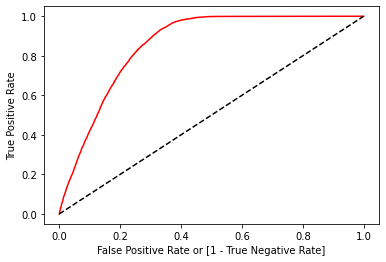

In [133]:
fpr, tpr, thresholds = roc_curve(y_test_1,gradient_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, gradient_pred_test)
print('Area Under Curve     :',auc_score)                          ## AUC-ROC Curve.
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = ''><b>5.5 <span style='color:#0386f7de'>|</span>  XGB <a id="prep"></a></font>

In [134]:
xgb_model = XGBClassifier(max_depth=12,random_state=15)
start_time = time.time()                           ## Fitting the XGB classifier.
xgb_model.fit(X_train_1,y_train_1)
print("Time taken by XGB"+ str((time.time() - start_time))+ " Seconds")

Time taken by XGB35.71836280822754 Seconds


In [135]:
xgb_pred_train = xgb_model.predict(X_train_1)                           ## Train Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_train_1,xgb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,xgb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,xgb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,xgb_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,xgb_pred_train))

Accuracy Score                 : 0.8665
Precision Score                : 0.7931
Recall Score                   : 0.9785
Confusion Matrix               :
 [[60182 18787]
 [ 1583 72009]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.97      0.76      0.86     78969
           1       0.79      0.98      0.88     73592

    accuracy                           0.87    152561
   macro avg       0.88      0.87      0.87    152561
weighted avg       0.89      0.87      0.87    152561



In [136]:
xgb_pred_test = xgb_model.predict(X_test_1)                          ## Test Accuracy.
print('Accuracy Score                 :',round(accuracy_score(y_test_1,xgb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,xgb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,xgb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,xgb_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,xgb_pred_test))

Accuracy Score                 : 0.8392
Precision Score                : 0.7651
Recall Score                   : 0.9624
Confusion Matrix               :
 [[19056  7254]
 [  923 23621]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     26310
           1       0.77      0.96      0.85     24544

    accuracy                           0.84     50854
   macro avg       0.86      0.84      0.84     50854
weighted avg       0.86      0.84      0.84     50854



Area Under Curve     : 0.8433407055060589


Text(0, 0.5, 'True Positive Rate')

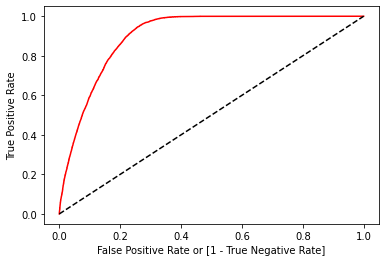

In [137]:
fpr, tpr, thresholds = roc_curve(y_test_1,xgb_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, xgb_pred_test)
print('Area Under Curve     :',auc_score)                      ## AUC-ROC Curve.
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

##  <font color = ''><b>6 <span style='color:#0386f7de'>|</span> All Model wise Accuracy <a id="prep"></a></font>

In [140]:
resultdata =[['Logistic Regression',0.6744,0.6771,0.6705,0.6495],
            ['Decision Tree',0.8108,0.8005, 0.7333,0.9219],
            ['Random Forest',0.8162,0.8078,0.7331,0.9462],
            ['Gradient Boosting',0.7945,0.7933,0.7290,0.9099],
             ['XGB',0.8665,0.84, 0.7651,0.9624]]

result_df = pd.DataFrame(resultdata,columns=['Models','Training Accuracy','Test Accuracy','Precision Score','Recall Score'])
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
0,Logistic Regression,0.6744,0.6771,0.6705,0.6495
1,Decision Tree,0.8108,0.8005,0.7333,0.9219
2,Random Forest,0.8162,0.8078,0.7331,0.9462
3,Gradient Boosting,0.7945,0.7933,0.7290,0.9099
4,XGB,0.8665,0.8400,0.7651,0.9624


In [141]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
4,XGB,0.8665,0.8400,0.7651,0.9624
2,Random Forest,0.8162,0.8078,0.7331,0.9462
1,Decision Tree,0.8108,0.8005,0.7333,0.9219
3,Gradient Boosting,0.7945,0.7933,0.7290,0.9099
0,Logistic Regression,0.6744,0.6771,0.6705,0.6495
